In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn import preprocessing, cluster, datasets, metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import model_selection, naive_bayes, svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans 

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

PATH = 'datasets/iris_data/'

## Iris Data Classification
An attempt to visualize the iris dataset through data visualization tools, and test several Machine Learning algorithms to predict the classification of entries.

Based on the results, the iris plants were relatively easy to classify with the classifiers aside from naive_bayes.

## DATA PREPARATION

In [2]:
# Preparing the Data
df = pd.read_csv(f'{PATH}iris_data.csv', header=None).rename(columns={0: 'sepal_length', 1: 'sepal_width', 2: 'petal_length', 3: 'petal_width', 4: 'class'})
print(f'Shape: {df.shape}')
print(f'{df}\n')
print('Info:')
print(df.info(), '\n')
print(f'Statistical Analysis:\n{df.describe()}\n')

Shape: (150, 5)
     sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 

In [3]:
# Separate x and y
Data_X = df.iloc[:,0:4]
Data_y = df.iloc[:,4]

# Define y values
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
targets_reg = [0.0, 1.0, 2.0]
colors = ['orange', 'green', 'blue']

## DATA VISUALIZATION

[Text(0, 0, '50'), Text(0, 0, '50'), Text(0, 0, '50')]

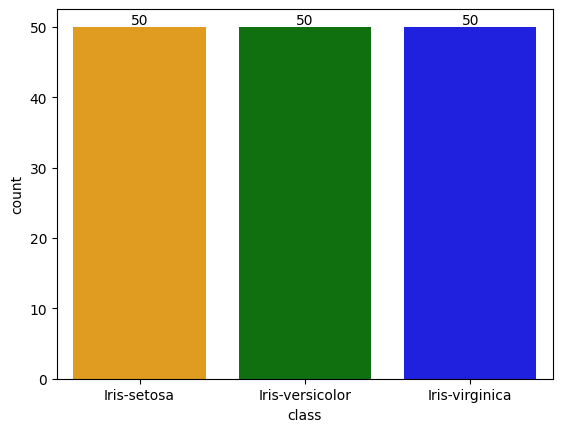

In [4]:
# Distribution of classes
abs_values = df['class'].value_counts(ascending=False).values
barplot = sns.countplot(x=df['class'], data=df, palette=colors)
barplot.bar_label(container=barplot.containers[0], labels=abs_values)

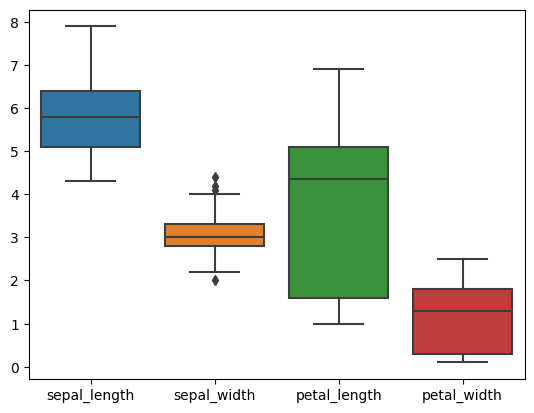

In [5]:
# Box Plot
box = sns.boxplot(data=Data_X, orient='v')

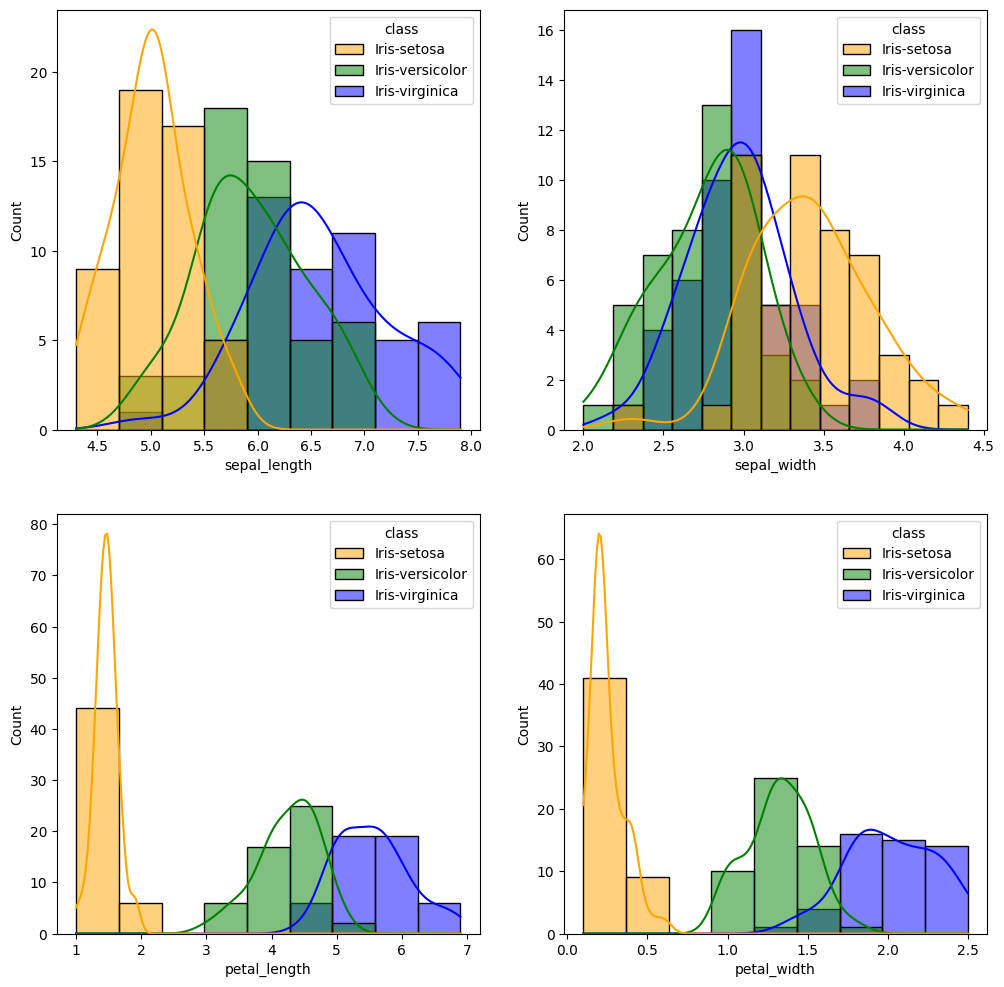

In [6]:
# Histogram Plot
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))
sns.histplot(df, x='sepal_length', hue='class', kde=True, palette=colors, ax=ax1)
sns.histplot(df, x='sepal_width', hue='class', kde=True, palette=colors, ax=ax2)
sns.histplot(df, x='petal_length', hue='class', kde=True, palette=colors, ax=ax3)
sns.histplot(df, x='petal_width', hue='class', kde=True, palette=colors, ax=ax4)
plt.show()

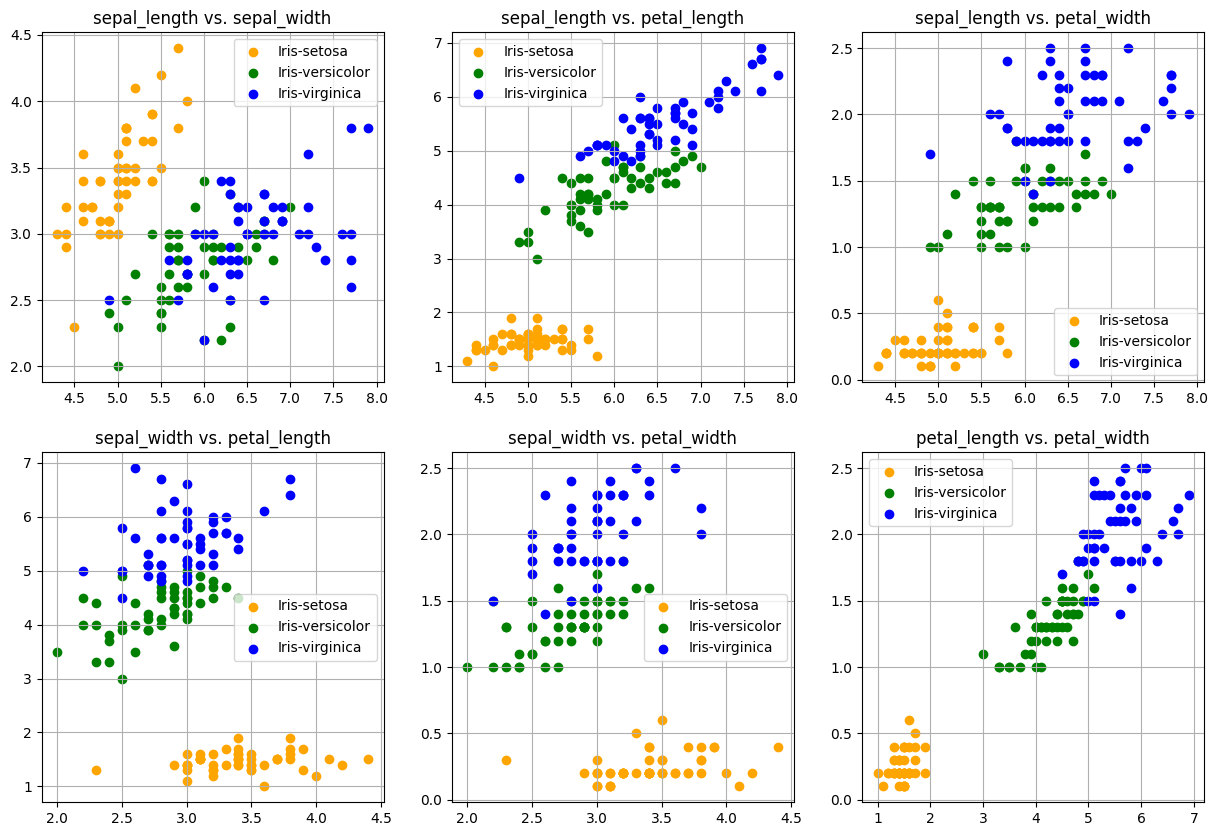

In [7]:
# Scatter Plot
var_list = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
pairs = list(combinations(var_list, 2))
var_titles = [f'{pairs[x][0]} vs. {pairs[x][1]}' for x in range(6)]

# All Pairs Scatter Plot
varx = [0, 1, 2, 3, 4, 5]
fig, ((varx[0], varx[1], varx[2]), (varx[3], varx[4], varx[5])) = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for index, title in enumerate(var_titles):
    varx[index].set_title(title, fontsize = 12)
    
    for target, color in zip(targets, colors):
        indicesToKeep = Data_y == target
        varx[index].scatter(Data_X.loc[indicesToKeep, pairs[index][0]], Data_X.loc[indicesToKeep, pairs[index][1]], c = color)
    varx[index].legend(targets)
    varx[index].grid()
plt.show()

## UNSUPERVISED METHODS

### DATA CLUSTERING

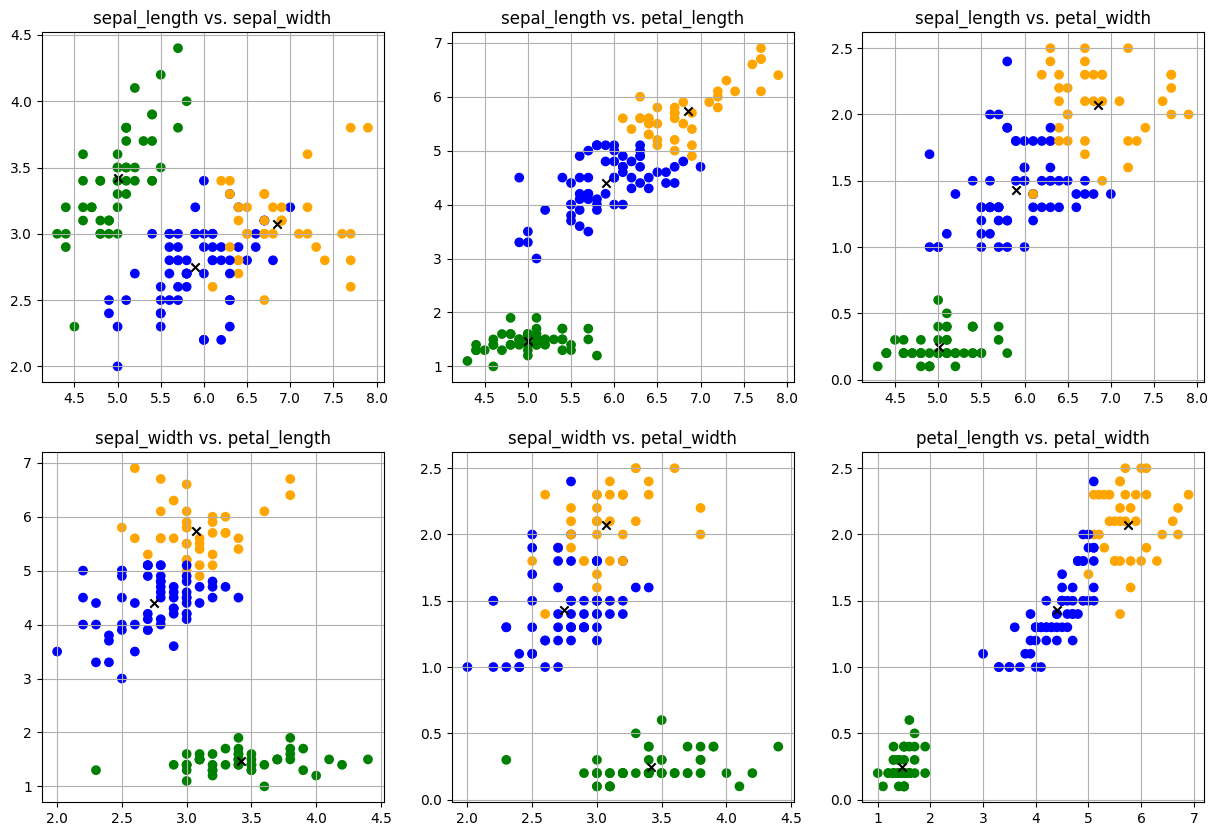

In [8]:
# K-Means Clustering
kmeans = cluster.KMeans(3)
kmeans.fit(Data_X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
new_colors = np.array(['orange', 'green', 'blue'])
pairs_num = list(combinations([0, 1, 2, 3], 2))

# All Pairs Scatter Plot
kmx = [0, 1, 2, 3, 4, 5]
fig, ((kmx[0],kmx[1],kmx[2]),(kmx[3],kmx[4],kmx[5])) = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for index, title in enumerate(var_titles):
    kmx[index].set_title(title, fontsize = 12)
    kmx[index].scatter(Data_X[pairs[index][0]], Data_X[pairs[index][1]], c=new_colors[labels])
    kmx[index].scatter(centroids[:,pairs_num[index][0]], centroids[:,pairs_num[index][1]], marker='x', c='black')
    kmx[index].grid()
plt.show()

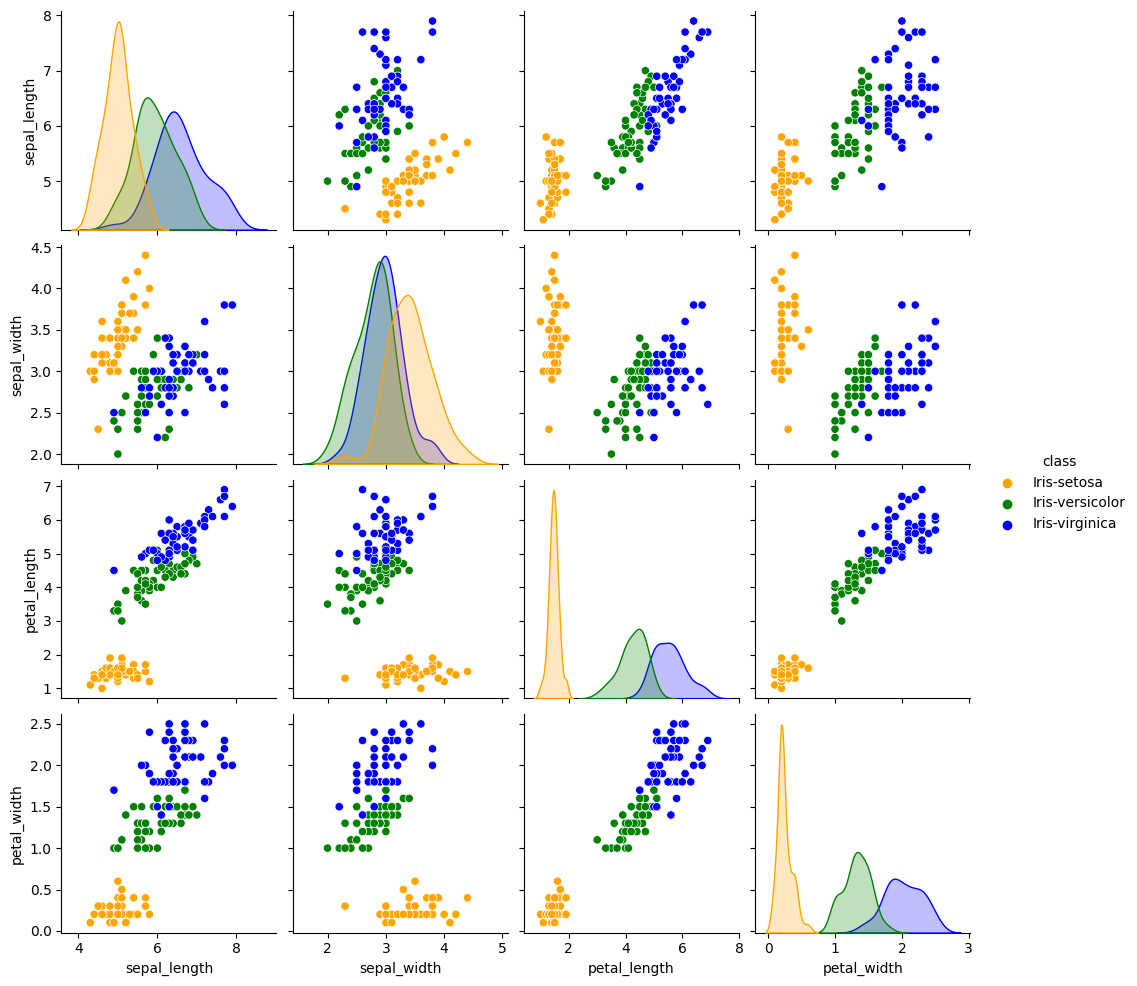

In [9]:
# Pairplot
sns.pairplot(df, hue='class', palette=colors)

### DIMENSIONALITY REDUCTION

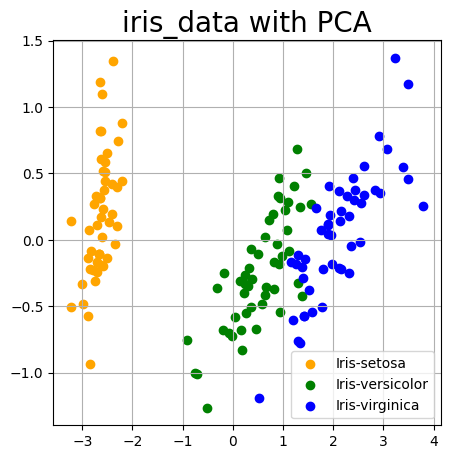

In [10]:
# PCA to lower dimensions
pca = PCA(n_components = 2)
pca2 = pca.fit_transform(Data_X)
new_df = pd.DataFrame(data=pca2, columns=['x1', 'x2'])

# PCA Scatter Plot
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(1, 1, 1) 
ax.set_title('iris_data with PCA', fontsize=20)

for target, color in zip(targets, colors):
    indicesToKeep = Data_y == target
    ax.scatter(new_df.loc[indicesToKeep, 'x1'], new_df.loc[indicesToKeep, 'x2'], c = color)
ax.legend(targets)
ax.grid()


# read data
table1 <- data.frame(read.csv('iris.csv', header=FALSE))
# table1

# prediction model
pred_model1 <- lm(table1$V5 ~ table1$V1 + table1$V2 + table1$V3 + table1$V4)
summary(pred_model1)
pred_table1 <- data.frame(predict(pred_model1))
pred_table1



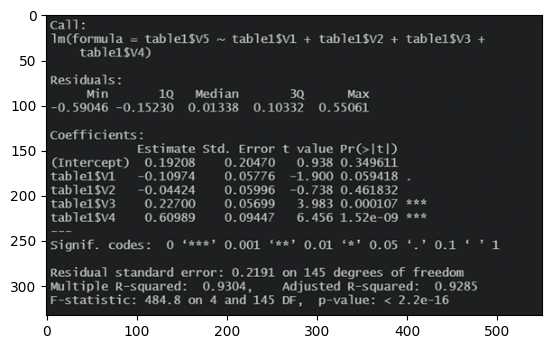

In [11]:
# Linear Regression [RStudio]

print('''
# read data
table1 <- data.frame(read.csv('iris.csv', header=FALSE))
# table1

# prediction model
pred_model1 <- lm(table1$V5 ~ table1$V1 + table1$V2 + table1$V3 + table1$V4)
summary(pred_model1)
pred_table1 <- data.frame(predict(pred_model1))
pred_table1
''')

img = mpimg.imread('r/linear_regression.png')
imgplot = plt.imshow(img)
plt.show()

## SUPERVISED METHODS

### CLASSIFIER TRAINING AND TESTING

In [12]:
# Prepare the training and testing sets (split 70:30)
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Data_X, Data_y, test_size=0.30)

In [13]:
# Prepare classifier algorithms
NB = naive_bayes.MultinomialNB()
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='scale', probability=True)
KNN = KNeighborsClassifier(n_neighbors=3)
LR = LogisticRegression(random_state=42)
RF = RandomForestClassifier(max_depth=15, random_state=42)

classifiers = [('NB', NB), ('SVM', SVM), ('KNN', KNN), ('LR', LR), ('RF', RF)]
actual_classifiers = [(x[0] + '_model') for x in classifiers]
num_classifiers = len(classifiers)

# Fit and evaluate the models
predictions = list()
scores = list()

for name, model in classifiers:
    model.fit(Train_X, Train_Y)
    predict = model.predict(Test_X)
    accuracy = accuracy_score(predict, Test_Y)*100
    predictions.append(predict)
    scores.append(round(accuracy, 4))
    
# Print the results
print('Classifier Models -> ', classifiers)

Classifier Models ->  [('NB', MultinomialNB()), ('SVM', SVC(kernel='linear', probability=True)), ('KNN', KNeighborsClassifier(n_neighbors=3)), ('LR', LogisticRegression(random_state=42)), ('RF', RandomForestClassifier(max_depth=15, random_state=42))]


### CLASSIFIER EVALUATION

#### CLASSIFIER REPORT

In [14]:
# Accuracy
print(f'Accuracy Scores -> {scores}\n')

# Classification Report
for x in range(num_classifiers):
    print(f'''{actual_classifiers[x]} Classification Report\n{classification_report(y_true=Test_Y, y_pred=predictions[x], 
            target_names=targets, digits=4, zero_division='warn')}''')

Accuracy Scores -> [55.5556, 100.0, 97.7778, 97.7778, 97.7778]

NB_model Classification Report
                 precision    recall  f1-score   support

    Iris-setosa     1.0000    1.0000    1.0000        11
Iris-versicolor     0.4118    1.0000    0.5833        14
 Iris-virginica     0.0000    0.0000    0.0000        20

       accuracy                         0.5556        45
      macro avg     0.4706    0.6667    0.5278        45
   weighted avg     0.3725    0.5556    0.4259        45

SVM_model Classification Report
                 precision    recall  f1-score   support

    Iris-setosa     1.0000    1.0000    1.0000        11
Iris-versicolor     1.0000    1.0000    1.0000        14
 Iris-virginica     1.0000    1.0000    1.0000        20

       accuracy                         1.0000        45
      macro avg     1.0000    1.0000    1.0000        45
   weighted avg     1.0000    1.0000    1.0000        45

KNN_model Classification Report
                 precision    recall 

#### CONFUSION MATRIX

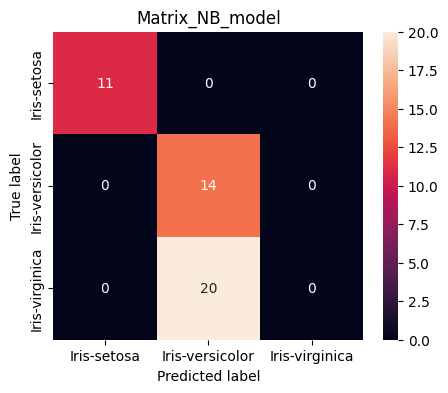

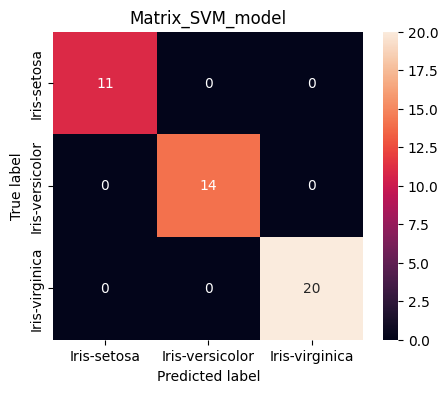

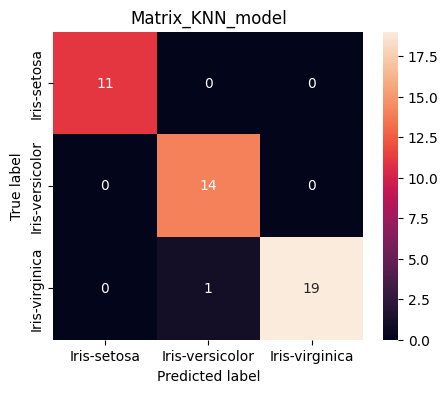

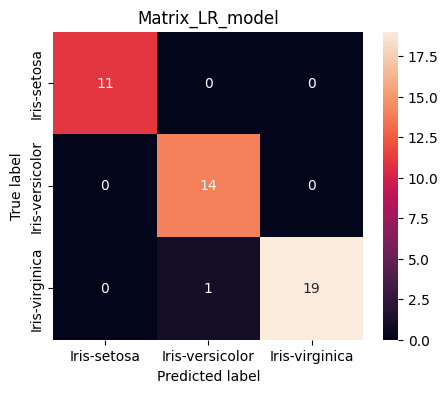

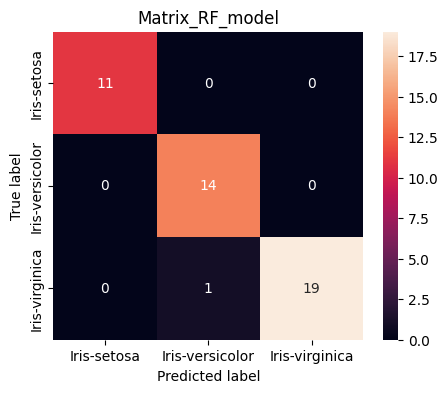

In [15]:
# Confusion Matrix
conf_matrix = [[]]*num_classifiers

for x in range(num_classifiers):
    conf_matrix[x] = confusion_matrix(Test_Y, predictions[x])

# Actual Confusion Matrix with Heatmap
for x in range(num_classifiers):
    plt.figure(figsize=(5, 4))
    s = sns.heatmap(conf_matrix[x], annot=True, fmt='d')
    s.xaxis.set_ticklabels(targets)
    s.yaxis.set_ticklabels(targets)
    s.set(xlabel='Predicted label', ylabel='True label', title=('Matrix_' + actual_classifiers[x]))

#### K-FOLD CROSS VALIDATION

In [16]:
# K-Fold Cross Validation

# Stratified Shuffle Split to shuffle the dataset
n_splits = 5
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.20, random_state=42)

# Actual K-Fold Cross Validation
kfscores = []

for train_index, test_index in sss.split(Data_X, Data_y):
    X_Train, X_Test = Data_X.iloc[train_index], Data_X.iloc[test_index]
    y_Train, y_Test = Data_y.iloc[train_index], Data_y.iloc[test_index]
    
    for name, model in classifiers:
        model.fit(X_Train, y_Train)
        predict = model.predict(X_Test)
        accuracy = accuracy_score(predict, y_Test)*100
        kfscores.append(accuracy)

# Print the kfscores
kfscores_r = np.reshape(kfscores, (n_splits, num_classifiers)).T
df.rename_axis('names')
print(pd.DataFrame(data = kfscores_r, index = actual_classifiers))
print('\n')

for x in range(num_classifiers):
    print(actual_classifiers[x] + ' K-Fold score with std. dev. is %.2f%% (+/-%.2f%%)' % (np.mean(kfscores_r[x]), np.std(kfscores_r[x])))

                    0          1          2           3          4
NB_model   100.000000  93.333333  90.000000   96.666667  86.666667
SVM_model  100.000000  96.666667  96.666667  100.000000  96.666667
KNN_model  100.000000  93.333333  96.666667  100.000000  90.000000
LR_model    96.666667  96.666667  96.666667   96.666667  93.333333
RF_model    90.000000  93.333333  96.666667   93.333333  93.333333


NB_model K-Fold score with std. dev. is 93.33% (+/-4.71%)
SVM_model K-Fold score with std. dev. is 98.00% (+/-1.63%)
KNN_model K-Fold score with std. dev. is 96.00% (+/-3.89%)
LR_model K-Fold score with std. dev. is 96.00% (+/-1.33%)
RF_model K-Fold score with std. dev. is 93.33% (+/-2.11%)


## CLASSIFIER IMPLEMENTATION

In [17]:
# Input data to models
print('Input the specific data:')
input_data = input('sepal_length, sepal_width, sepal_width, petal_width [ex. 5.1, 3.5, 1.4, 0.2]: ')
sl, sw, pl, pw = input_data.split(',')
dp = pd.DataFrame(data={'sepal_length': [float(sl)], 'sepal_width': [float(sw)], 'petal_length': [float(pl)], 'petal_width': [float(pw)]})
print('\nYour input: \n', dp)

# Predictions
dp_pred = []

for name, model in classifiers:
    model_predict = model.predict(dp)
    dp_pred.append(model_predict)

print('\nPredictions:')
for index, pred in enumerate(dp_pred):
    print(actual_classifiers[index], 'Predicted: ', dp_pred[index])

Input the specific data:

Your input: 
    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.1

Predictions:
NB_model Predicted:  ['Iris-setosa']
SVM_model Predicted:  ['Iris-setosa']
KNN_model Predicted:  ['Iris-setosa']
LR_model Predicted:  ['Iris-setosa']
RF_model Predicted:  ['Iris-setosa']


## REFERENCE:
https://archive.ics.uci.edu/ml/datasets/iris